![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

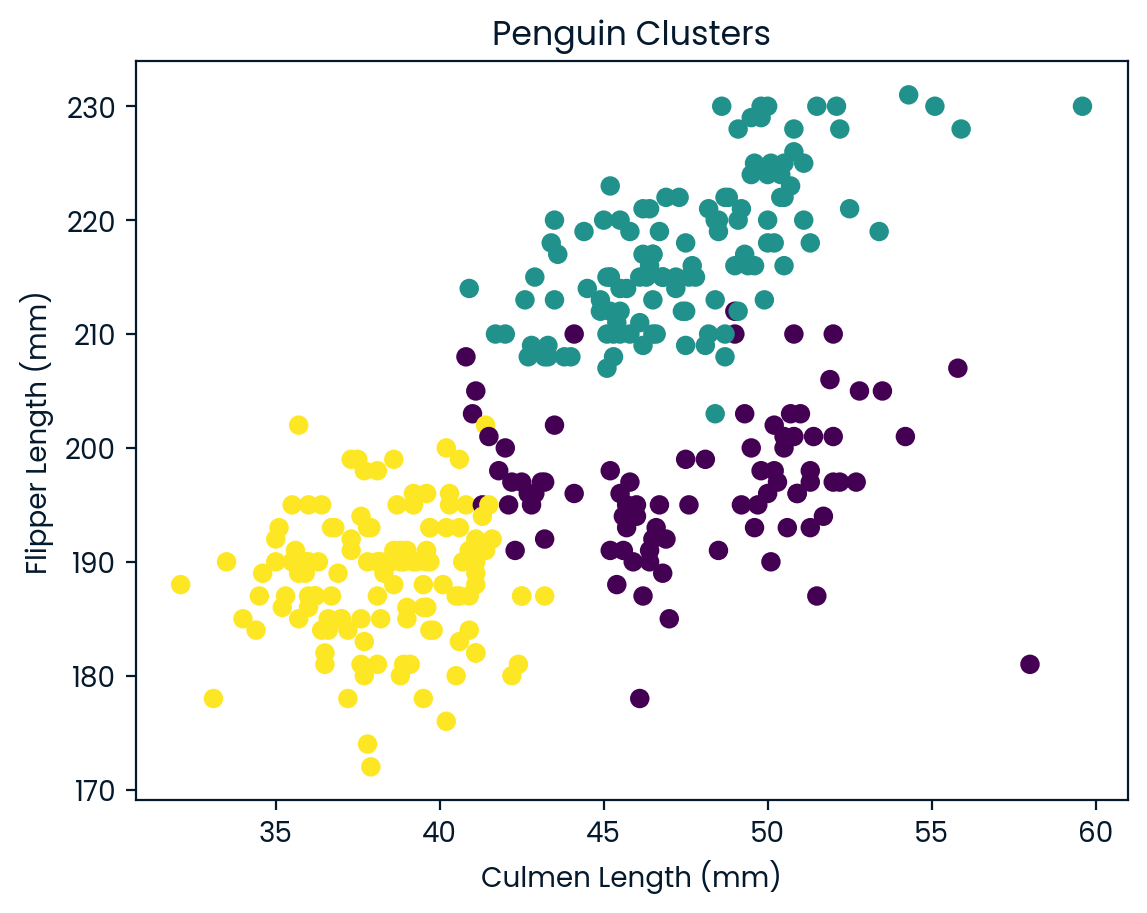

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df[features].dropna()

valid_indices = X.index

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=3, random_state=42)
model.fit(X_scaled)

penguins_clean = penguins_df.loc[valid_indices].copy()
penguins_clean['cluster'] = model.labels_

stat_penguins = penguins_clean.groupby('cluster')[features].mean()

plt.scatter(X['culmen_length_mm'], X['flipper_length_mm'], c=model.labels_)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Penguin Clusters')
plt.show()